In [57]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

In [10]:
#nltk.download('vader_lexicon')

In [11]:
df = pd.read_csv('input/tweets_of_f234_users_1663839312.csv')

In [12]:
df

,userid,account_type,clean_tweet
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https..."
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht..."
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t..."
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:..."
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t..."
...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...
488634,3077047801,bot,If you're trying to get fit keep working. You...
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...


In [49]:
userid_accountype = df[['userid', 'account_type']].drop_duplicates()

In [51]:
userid_accountype['account_type'].value_counts()

human    146
bot       71
Name: account_type, dtype: int64

In [25]:
%%time
pred = []
vader_label = []
sid = SentimentIntensityAnalyzer()
for sentence in df['clean_tweet'].values:
       
    ss = sid.polarity_scores(sentence)
    
    pred.append(ss['compound'])
    
    if(ss['compound'] < 0.05 and ss['compound'] > -0.05):
        vader_label.append('neutral')
    elif(ss['compound'] >= 0.05):
        vader_label.append('positive')
    elif(ss['compound'] <= -0.05):
        vader_label.append('negative')

CPU times: user 2min 11s, sys: 1.28 s, total: 2min 13s
Wall time: 2min 13s


In [28]:
df['vader_sentiment'] = pred
df['vader_label'] = vader_label

In [29]:
df

,userid,account_type,clean_tweet,vader_sentiment,vader_label
0,787405734442958848,bot,"We can put the ""River"" in ""Screwdrivers"" https...",0.0000,neutral
1,787405734442958848,bot,"You can't extract the ""Pong"" from ""Sponged"" ht...",0.0000,neutral
2,787405734442958848,bot,"Put the ""Nope"" back in ""Inoperative"" https://t...",0.0000,neutral
3,787405734442958848,bot,"We can't spell ""Artworks"" without ""Two"" https:...",0.0000,neutral
4,787405734442958848,bot,"You can be the ""She"" in ""Astonished"" https://t...",0.0000,neutral
...,...,...,...,...,...
488632,3077047801,bot,A Tribute – Joan Rivers on Fitness http://t.co...,0.2732,positive
488633,3077047801,bot,Live in Orlando area? Want a personal trainer?...,0.1680,positive
488634,3077047801,bot,If you're trying to get fit keep working. You...,0.8608,positive
488635,3077047801,bot,Ready for summer? Cheap cool sunglasses - loo...,0.7430,positive


In [35]:
df_mean_sentiment = df.groupby(['userid', 'vader_label']).mean().reset_index()

In [41]:
df_mean_sentiment.rename({'vader_sentiment': 'mean_sentiment'}, axis='columns', inplace = True)

In [42]:
df_mean_sentiment

,userid,vader_label,mean_sentiment
0,418,negative,-0.431048
1,418,neutral,0.000060
2,418,positive,0.565365
3,586,negative,-0.461686
4,586,neutral,0.000057
...,...,...,...
635,1014793793353199617,neutral,0.000009
636,1014793793353199617,positive,0.509822
637,1034115201979826178,negative,-0.344304
638,1034115201979826178,neutral,-0.000113


In [37]:
df_var_sentiment = df.groupby(['userid', 'vader_label']).var().reset_index()

In [43]:
df_var_sentiment.rename({'vader_sentiment': 'variance_sentiment'}, axis='columns', inplace = True)

In [44]:
df_var_sentiment

,userid,vader_label,variance_sentiment
0,418,negative,0.041141
1,418,neutral,0.000013
2,418,positive,0.044232
3,586,negative,0.053643
4,586,neutral,0.000038
...,...,...,...
635,1014793793353199617,neutral,0.000019
636,1014793793353199617,positive,0.042989
637,1034115201979826178,negative,0.034591
638,1034115201979826178,neutral,0.000016


In [45]:
df_var_sentiment_without_neutral = df_var_sentiment.drop(df_var_sentiment[df_var_sentiment.vader_label == 'neutral'].index)

In [46]:
df_var_sentiment_without_neutral

,userid,vader_label,variance_sentiment
0,418,negative,0.041141
2,418,positive,0.044232
3,586,negative,0.053643
5,586,positive,0.052634
6,2622731,negative,0.051949
...,...,...,...
633,1006905571994472448,positive,0.048448
634,1014793793353199617,negative,0.045568
636,1014793793353199617,positive,0.042989
637,1034115201979826178,negative,0.034591


In [47]:
df_mean_var = df_mean_sentiment.merge(df_var_sentiment_without_neutral, on=['userid', 'vader_label'], how = 'inner')

In [48]:
df_mean_var

,userid,vader_label,mean_sentiment,variance_sentiment
0,418,negative,-0.431048,0.041141
1,418,positive,0.565365,0.044232
2,586,negative,-0.461686,0.053643
3,586,positive,0.548898,0.052634
4,2622731,negative,-0.434621,0.051949
...,...,...,...,...
418,1006905571994472448,positive,0.565392,0.048448
419,1014793793353199617,negative,-0.473791,0.045568
420,1014793793353199617,positive,0.509822,0.042989
421,1034115201979826178,negative,-0.344304,0.034591


In [52]:
df_mean_var_w_label = df_mean_var.merge(userid_accountype, on = 'userid', how = 'inner')

In [53]:
df_mean_var_w_label

,userid,vader_label,mean_sentiment,variance_sentiment,account_type
0,418,negative,-0.431048,0.041141,human
1,418,positive,0.565365,0.044232,human
2,586,negative,-0.461686,0.053643,human
3,586,positive,0.548898,0.052634,human
4,2622731,negative,-0.434621,0.051949,human
...,...,...,...,...,...
418,1006905571994472448,positive,0.565392,0.048448,human
419,1014793793353199617,negative,-0.473791,0.045568,human
420,1014793793353199617,positive,0.509822,0.042989,human
421,1034115201979826178,negative,-0.344304,0.034591,human


In [54]:
df_mean_var_w_label['account_type'].value_counts()

human    289
bot      134
Name: account_type, dtype: int64

<AxesSubplot:xlabel='mean_sentiment', ylabel='variance_sentiment'>

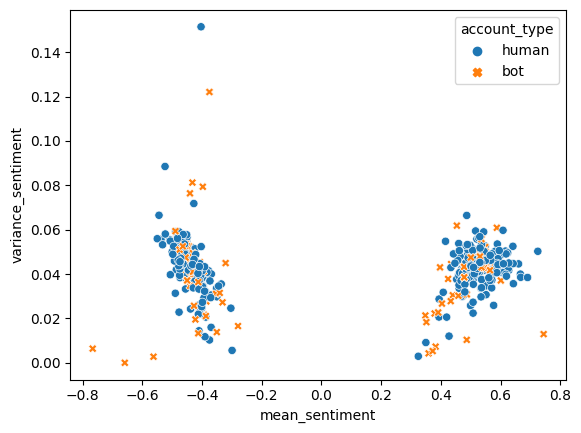

In [58]:
sns.scatterplot(data = df_mean_var_w_label, x = "mean_sentiment", y = "variance_sentiment", hue = "account_type", style = "account_type")